<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries-Used" data-toc-modified-id="Libraries-Used-1">Libraries Used</a></span></li><li><span><a href="#Specific-Aims" data-toc-modified-id="Specific-Aims-2">Specific Aims</a></span></li><li><span><a href="#Research" data-toc-modified-id="Research-3">Research</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-4">Methods</a></span><ul class="toc-item"><li><span><a href="#Structure-of-KLH" data-toc-modified-id="Structure-of-KLH-4.1">Structure of KLH</a></span><ul class="toc-item"><li><span><a href="#Load-Information" data-toc-modified-id="Load-Information-4.1.1">Load Information</a></span></li><li><span><a href="#Check-data-image" data-toc-modified-id="Check-data-image-4.1.2">Check data image</a></span></li><li><span><a href="#Information-about-4BED" data-toc-modified-id="Information-about-4BED-4.1.3">Information about 4BED</a></span></li><li><span><a href="#Atom-by-atom-distance-matrix" data-toc-modified-id="Atom-by-atom-distance-matrix-4.1.4">Atom by atom distance matrix</a></span></li><li><span><a href="#Alpha-distance-calculator-for-protein-dictionaries" data-toc-modified-id="Alpha-distance-calculator-for-protein-dictionaries-4.1.5">Alpha distance calculator for protein dictionaries</a></span></li><li><span><a href="#Protein-dictionary-distance-matrix" data-toc-modified-id="Protein-dictionary-distance-matrix-4.1.6">Protein dictionary distance matrix</a></span></li><li><span><a href="#Save-Distance-matrix-for-latter" data-toc-modified-id="Save-Distance-matrix-for-latter-4.1.7">Save Distance matrix for latter</a></span></li><li><span><a href="#Plot-Distance-Matrix" data-toc-modified-id="Plot-Distance-Matrix-4.1.8">Plot Distance Matrix</a></span></li><li><span><a href="#Different-methods-for-setting-distance-matrices." data-toc-modified-id="Different-methods-for-setting-distance-matrices.-4.1.9">Different methods for setting distance matrices.</a></span></li></ul></li><li><span><a href="#Phylogenics-I" data-toc-modified-id="Phylogenics-I-4.2">Phylogenics I</a></span></li><li><span><a href="#Phylogenetics-II" data-toc-modified-id="Phylogenetics-II-4.3">Phylogenetics II</a></span><ul class="toc-item"><li><span><a href="#Kmer-analysis" data-toc-modified-id="Kmer-analysis-4.3.1">Kmer analysis</a></span></li><li><span><a href="#Download-File" data-toc-modified-id="Download-File-4.3.2">Download File</a></span></li><li><span><a href="#Blast" data-toc-modified-id="Blast-4.3.3">Blast</a></span></li><li><span><a href="#Parse-Blast-Results" data-toc-modified-id="Parse-Blast-Results-4.3.4">Parse Blast Results</a></span></li></ul></li></ul></li><li><span><a href="#Citations" data-toc-modified-id="Citations-5">Citations</a></span></li></ul></div>

# An Investigation of Keyhole Limpet Hemocyanin

<img src="images/klh.JPG"><br>

## Libraries Used

In [1]:
# Basic Libraries
from random import choices, randint
from collections import Counter, defaultdict
import re
from glob import glob
import itertools
import pickle
import json

# Data Science
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from fastcluster import linkage

# Calculate distance between strings
from Levenshtein import distance as l_dist

# Visulization Libraries
import pylab
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from IPython.display import Video, HTML
import pytraj as pt
import nglview as nv
from mpl_toolkits import mplot3d

# Biopython libraries
import Bio
from Bio import AlignIO, SeqIO, pairwise2, Phylo, Entrez
from Bio.Seq import Seq
from Bio.pairwise2 import format_alignment
from Bio.PDB import *
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.Align.Applications import ClustalwCommandline

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator 

# Web Crawlers 
import requests
import subprocess
Entrez.email = "hofferd78@gmail.com"

# Multiprocessing 
import multiprocessing

In [50]:
import warnings

## Specific Aims

Hemocyanin is the copper-containing, main oxygen carrying protein commonly used in the blood of arthropods, mollusks, and some other invertebrates. Hemocyanin is of interest in biomedical research because of its use as an adjuvant in vaccine development. Unfortunately, current production of hemocyanin as an adjuvant is extremely expensive with the harvesting process requiring blood from the limpet Megathura crenulata. Key-Hole Limpet hemocyanin (KLH) is challenging to produce with recombinant techniques due to the large size of the protein. The cost of extraction ranges between five thousand to one hundred and fifty thousand dollars per gram of KLH. <br><br>
Due to the increased demand, vaccine adjuvants may present as a bottleneck for future vaccine development. Recombinant KLH that has been produced with E. coli, however, is not used for general medical practice due to unsuitable purity. While the structure of KLH has been resolved to 9Å Angstroms, with its functional unit resolved to 4Å, potential alternative hemocyanin sources to this protein have not been determined with imaging techniques such as Cryo-EM or X-ray crystallography.  <br><br>
The goal of this work will be two-fold.  First, this work aims to understand the significance of adjuvants in relation to KLH, exploring the properties of its medicinal use and tradeoffs to alternative adjuvants. Second, this work aims to explore the structure of KLH using computational and bioinformatic techniques in conjunction with analysis found in literature, highlighting potential alternatives to this important protein. 


## Research

## Methods

### Structure of KLH

Using ChimeraX the structure of KLH will be modeled. Subunits of the protein will be highlighted. Biochemistry of the amino acids will be considered and a distance matrix will be constructed. Copper chemistry and activity of the active sites will also be conducted. The focus will be on understanding the tertiary structure of each KLH subunit.

#### Load Information

In [3]:
warnings.filterwarnings('ignore')

pdb_code = "4BED"
pdb_filename = "data/4bed.pdb1"

key_hole = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_filename)
key_hole_atoms = [i for i in key_hole.get_atoms()]

First we check to see if the length of the 4BED protein is correct

In [4]:
len(key_hole_atoms)

552920

Next we create a dictionary of all of the different atoms, distances, etc

In [5]:
klh_atom_dictionary = {}
klh_location = []
for atom in key_hole_atoms:
    klh_atom_dictionary[atom.serial_number - 1] = {
        "atom_name": atom.name,
        "element": atom.element,
        "amino_group": atom.parent.resname,
        "amino_index": atom.parent.id[1] - 1,
        "sub_unit": atom.parent.parent.id,
        "np_coord": atom.coord,
        "coord": [atom.coord[0], atom.coord[1], atom.coord[2]]
    }
    # This is just too big to try and solve directly
    klh_location.append([atom.coord[0], atom.coord[1], atom.coord[2]])

In [6]:
x = [i[0] for i in klh_location]
y = [i[1] for i in klh_location]
z = [i[2] for i in klh_location]

#### Check data image

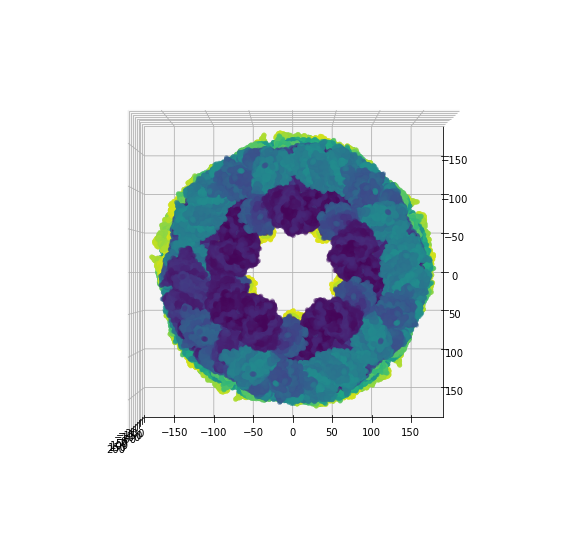

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.view_init(90, 0) 
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

#### Information about 4BED

Test find indices of copper atoms in KHL

In [8]:
copper_indices = []
for atom in klh_atom_dictionary:
    a = klh_atom_dictionary[atom]
    if a["element"] == "CU":
        copper_indices.append(atom)
        
print(copper_indices)

[55232, 55233, 55236, 55237, 55240, 55241, 55244, 55245, 55248, 55249, 55252, 55253, 55256, 55257, 55260, 55261, 55264, 55265, 55268, 55269, 55272, 55273, 55276, 55277, 55280, 55281, 55284, 55285, 55288, 55289, 55292, 55293]


In [9]:
klh_atom_dictionary[1]

{'atom_name': 'CA',
 'element': 'C',
 'amino_group': 'GLU',
 'amino_index': 0,
 'sub_unit': 'A',
 'np_coord': array([  -1.432, -134.101, -170.128], dtype=float32),
 'coord': [-1.432, -134.101, -170.128]}

In [10]:
klh_atom_dictionary[55293]

{'atom_name': 'CU2',
 'element': 'CU',
 'amino_group': 'CUO',
 'amino_index': 9007,
 'sub_unit': 'D',
 'np_coord': array([  74.077,  -40.231, -160.703], dtype=float32),
 'coord': [74.077, -40.231, -160.703]}

#### Atom by atom distance matrix

Since there are so many atom in the total KLH, we will not be able to make a complete distance matrix for every matrix, however we can make a distance matrix for each subunit.

In [11]:
klh_alpha_carbons ={k:v for k,v in klh_atom_dictionary.items() 
                                if v["atom_name"] == "CA" or v["element"] == "CU"}

In [12]:
len(klh_alpha_carbons)

6828

#### Alpha distance calculator for protein dictionaries

In [13]:
# Modified from code at https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/protein_contact_map/
def calc_alpha_distance(r_1, r_2, p_dict):
    """Take key values from protein dict and calcualtes distance"""
    diff_vect = p_dict[r_1]["np_coord"] - p_dict[r_2]["np_coord"]
    return np.sqrt(np.sum(diff_vect * diff_vect))

In [14]:
klh_alpha_carbons[1]

{'atom_name': 'CA',
 'element': 'C',
 'amino_group': 'GLU',
 'amino_index': 0,
 'sub_unit': 'A',
 'np_coord': array([  -1.432, -134.101, -170.128], dtype=float32),
 'coord': [-1.432, -134.101, -170.128]}

In [15]:
klh_alpha_carbons[109]

{'atom_name': 'CA',
 'element': 'C',
 'amino_group': 'GLU',
 'amino_index': 13,
 'sub_unit': 'A',
 'np_coord': array([ -16.857, -128.752, -159.343], dtype=float32),
 'coord': [-16.857, -128.752, -159.343]}

In [16]:
calc_alpha_distance(1, 109, klh_alpha_carbons)

19.566776

In [17]:
[[i,j] for i,j in enumerate(klh_alpha_carbons.keys())][0:3]

[[0, 1], [1, 10], [2, 18]]

#### Protein dictionary distance matrix

In [18]:
# TODO add multiprocessing to this line
def calc_dist_matrix(p_dict):
    """Returns a numpy matrix for all key entries in a protein dictionary"""
    matrix = np.zeros((len(p_dict), len(p_dict)), np.float)
    for row, i in enumerate(p_dict.keys()):
        for column, j in enumerate(p_dict.keys()):
            matrix[row, column] = calc_alpha_distance(i, j, p_dict)
            if row % 500 == 0 and column == 0:
                print("Procesing row #{}".format(row))
            
    return matrix

In [19]:
alpha_distance_matrix = calc_dist_matrix(klh_alpha_carbons)

Procesing row #0
Procesing row #500
Procesing row #1000
Procesing row #1500
Procesing row #2000
Procesing row #2500
Procesing row #3000
Procesing row #3500
Procesing row #4000
Procesing row #4500
Procesing row #5000
Procesing row #5500
Procesing row #6000
Procesing row #6500


#### Save Distance matrix for latter

In [20]:
with open('data/distance_matrix.pickle', 'wb') as handle:
    pickle.dump(alpha_distance_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### Plot Distance Matrix

In [21]:
alpha_distance_matrix[0:1]

array([[  0.        ,   3.75266671,   6.29493475, ..., 173.45292664,
        118.81137085, 120.83880615]])

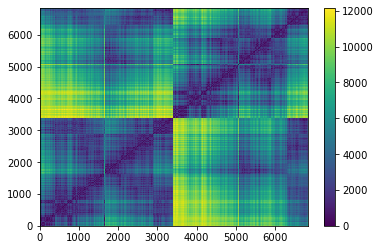

<Figure size 2000x2000 with 0 Axes>

In [22]:
N = len(alpha_distance_matrix)
dist_mat = squareform(pdist(alpha_distance_matrix))

plt.pcolormesh(np.transpose(dist_mat))
plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.figure(figsize=(10,10), dpi = 200);
plt.show();

In [23]:
# I lifted this from a website, list the source later. 
# This is also screaming for multithreading will change code and add it
# later
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

#### Different methods for setting distance matrices.

I haven't seen anyone apply this type of analysis to any protein contact maps before, I am really excited about this idea, and I will update how it effects pytorch analysis.

Method:	 ward


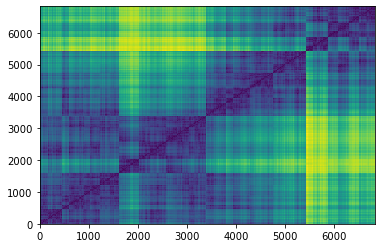

Method:	 single


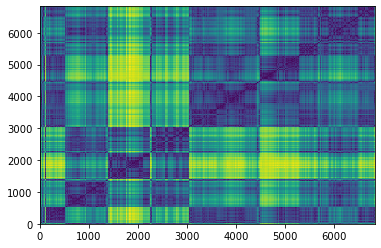

Method:	 average


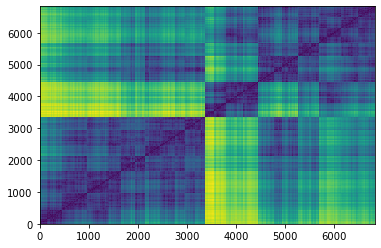

Method:	 complete


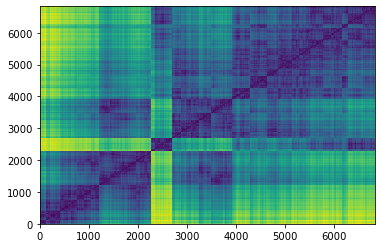

In [24]:
methods = ["ward","single","average","complete"]
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat,method)
    
    plt.pcolormesh(ordered_dist_mat)
    plt.xlim([0,N])
    plt.ylim([0,N])
    plt.show()

In [ ]:
# Experiment with new clustering options like
# from sklearn.cluster.bicluster import SpectralBiclustering
# model = SpectralBiclustering(n_clusters=4)
# model.fit(mat)
# sortedmat = mat.T[np.argsort(model.row_labels_)]
# sortedmat = fit_data[:, np.argsort(model.column_labels_)]

### Phylogenics I

In [9]:
# Open the alignment file as a MultipleSeqAlignment object 
chain_a = "M_crenulata_4BED_1_Chain_A_91912.aln"
chain_a = "M_crenulata_4BED_1_Chain_A_91912.aln"

with open("data/aligned.clw","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")

calculator = DistanceCalculator()

In [61]:
calculator.models

['identity',
 'benner22',
 'benner6',
 'benner74',
 'dayhoff',
 'feng',
 'genetic',
 'gonnet1992',
 'hoxd70',
 'johnson',
 'jones',
 'levin',
 'mclachlan',
 'mdm78',
 'blastn',
 'rao',
 'risler',
 'schneider',
 'str',
 'trans',
 'blosum45',
 'blosum50',
 'blosum62',
 'blosum80',
 'blosum90',
 'pam250',
 'pam30',
 'pam70']

In [62]:
distance_matrix = calculator.get_distance(alignment, )

In [55]:
[" ".join(x.split("_")[0:5]) for x in distance_matrix.names]

['T pacificus 4YD9 2 Chain',
 'T pacificus 4YD9 1 Chain',
 'N nucleus CAH10286.1 Chain 1',
 'N nucleus CAH10287.1 Chain 2',
 'M crenulata 4BED 1 Chain',
 'H discus hannai AYD59981.1 Chain',
 'H tuberculata CAC82192.1 Chain B',
 'H rubra ANE23705.1 Chain 2',
 'M Crenulata 4BED 2 Chain',
 'H diversicolor Chain A',
 'H diversicolor Chain B',
 'H discus hannai AYD59980.1 Chain',
 'H tuberculata CAC20588.1 Chain A',
 'H rubra ANE23704.1 Chain 1',
 'T pacificus 4YD9 3 Chain',
 'L stagnalis AYO86691.1 Chain 1',
 'L stagnalis AYO86692.1 Chain 2']

In [5]:
names = ['T pacificus Chain 2',
 'T pacificus Chain 1',
 'N nucleus Chain 1',
 'N nucleus Chain 2',
 'M crenulata Chain 1',
 'H discus hannai Chain 2',
 'H tuberculata Chain 2',
 'H rubra Chain 2',
 'M crenulata Chain 2',
 'H diversicolor Chain 1',
 'H diversicolor Chain 2',
 'H discus hannai Chain 1',
 'H tuberculata Chain 1',
 'H rubra Chain 1',
 'T pacificus Chain 3',
 'L stagnalis Chain 1',
 'L stagnalis Chain 2']

orig_names = ['T pacificus 4YD9 2 Chain',
 'T pacificus 4YD9 1 Chain',
 'N nucleus CAH10286.1 Chain 1',
 'N nucleus CAH10287.1 Chain 2',
 'M crenulata 4BED 1 Chain',
 'H discus hannai AYD59981.1 Chain',
 'H tuberculata CAC82192.1 Chain B',
 'H rubra ANE23705.1 Chain 2',
 'M Crenulata 4BED 2 Chain',
 'H diversicolor Chain A',
 'H diversicolor Chain B',
 'H discus hannai AYD59980.1 Chain',
 'H tuberculata CAC20588.1 Chain A',
 'H rubra ANE23704.1 Chain 1',
 'T pacificus 4YD9 3 Chain',
 'L stagnalis AYO86691.1 Chain 1',
 'L stagnalis AYO86692.1 Chain 2']

# this is a weird thing that phylo is making me do
name_dict = {}
for orig_name, name in zip(names, orig_names):
    name_dict[orig_name] = name
    

Here I am a little confused about which protein model to apply. 

In [102]:
distance_options = {}
for distance_type in ['blosum90', 'identity',  'pam30', 'gonnet1992']:
    
    # Here we want to compare these different caluclations in a dictionary
    print(distance_type)
    distance_options[distance_type] = {}
    calculator = DistanceCalculator(model=distance_type)
    distance_options[distance_type]["calculator"] = calculator
    distance_matrix = calculator.get_distance(alignment)
    distance_matrix.names = names
    distance_options[distance_type]["distance_matrix"] = distance_matrix

blosum90
identity
pam30
gonnet1992


In [103]:
for i in distance_options:
    print(i)

blosum90
identity
pam30
gonnet1992


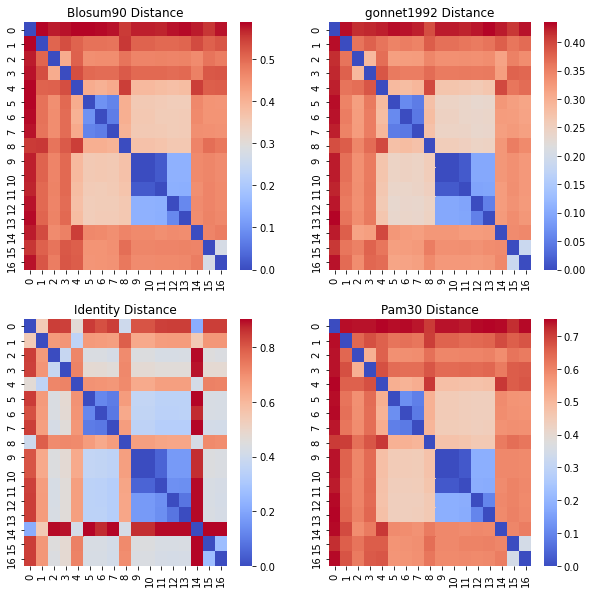

In [105]:
figure, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0,0].set_title("Blosum90 Distance");
sns.heatmap(np.array(distance_options["blosum90"]["distance_matrix"]), 
            cmap='coolwarm', annot=False,  ax = ax[0,0])

ax[1,0].set_title("Identity Distance");
sns.heatmap(np.array(distance_options["identity"]["distance_matrix"]), 
            cmap='coolwarm', annot=False,  ax = ax[1,0])

ax[1,1].set_title("Pam30 Distance");
sns.heatmap(np.array(distance_options["pam30"]["distance_matrix"]),
            cmap='coolwarm', annot=False,  ax = ax[1,1])

ax[0,1].set_title("gonnet1992 Distance");
sns.heatmap(np.array(distance_options["gonnet1992"]["distance_matrix"]),
            cmap='coolwarm', annot=False,  ax = ax[0,1])

In [6]:
with open("data/aligned.clw","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")

calculator = DistanceCalculator(model="pam30")
constructor = DistanceTreeConstructor(calculator)
distance_matrix = calculator.get_distance(alignment)
distance_matrix.names = names

# Build the tree 
snail_tree = constructor.build_tree(alignment)
snail_tree.names = names
snail_tree.rooted = True

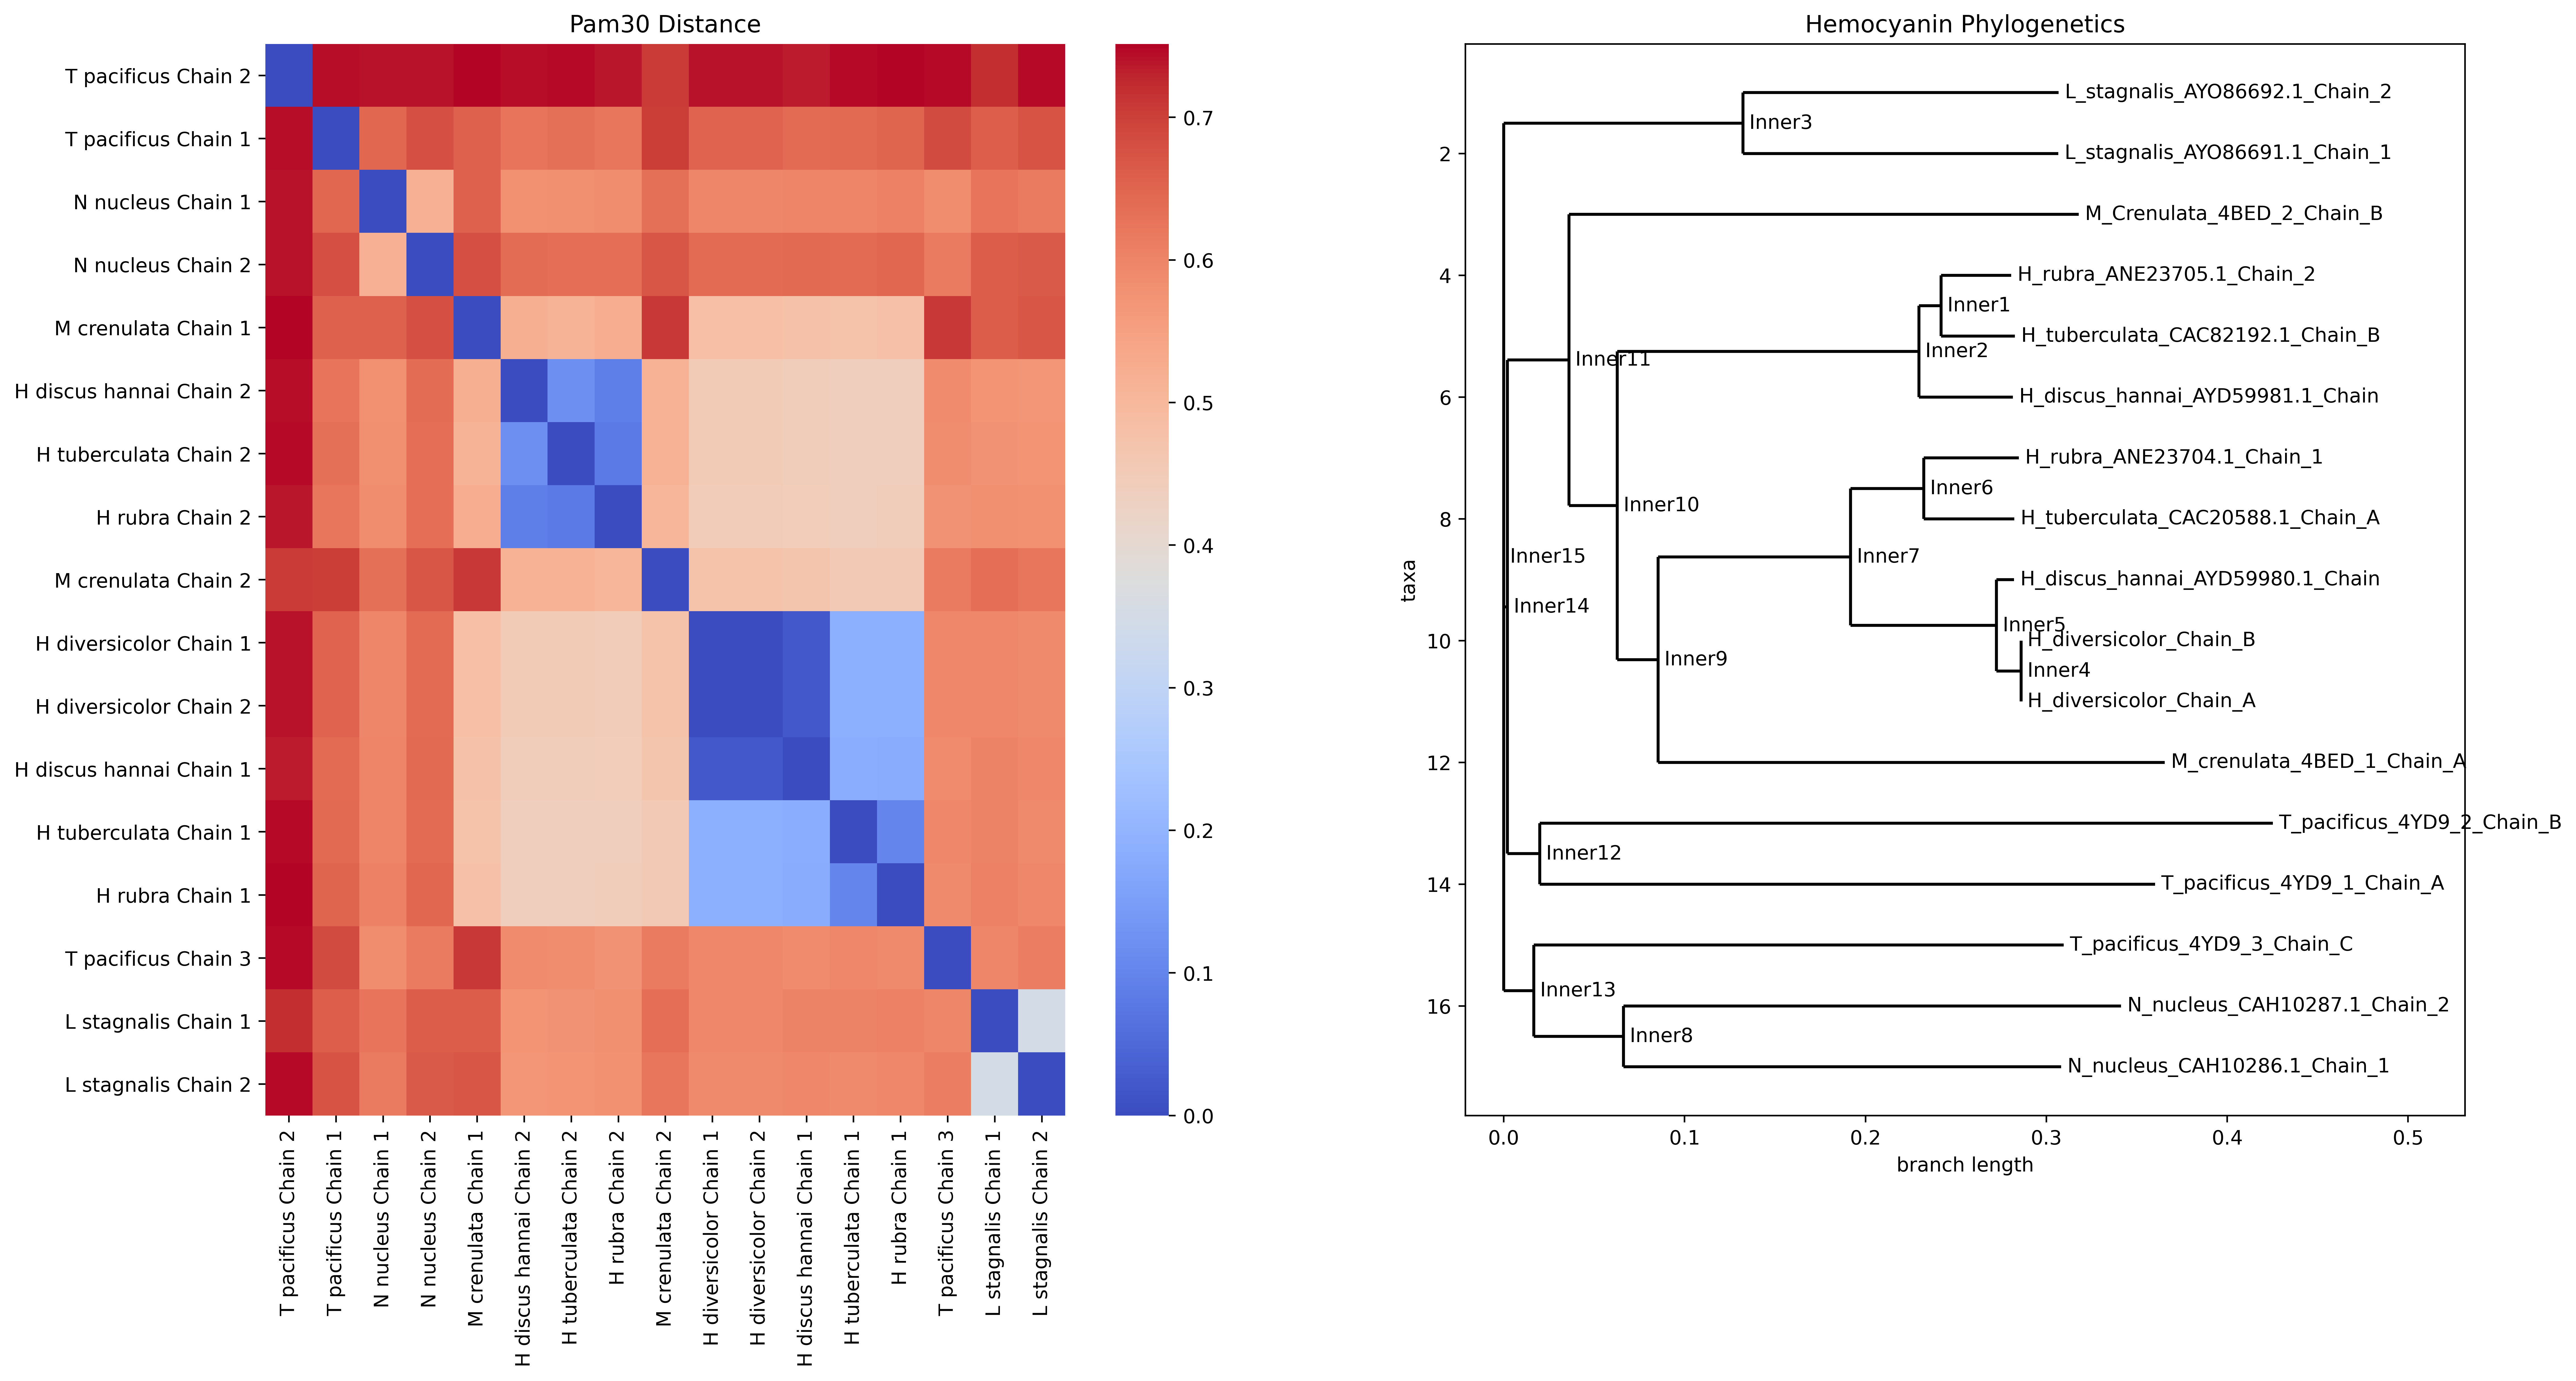

In [7]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi = 500)

#Phylo.draw(snail_tree, axes=axes,show_confidence=True, ax = ax[1])

ax[0].set_title("Pam30 Distance");
sns.heatmap(np.array(distance_matrix),
            cmap='coolwarm', 
            annot=False, 
            xticklabels=distance_matrix.names,
            yticklabels=distance_matrix.names,
            ax = ax[0])

ax[1].set_title('Hemocyanin Phylogenetics');
Phylo.draw(snail_tree, axes=ax[1], show_confidence=False, do_show = True)


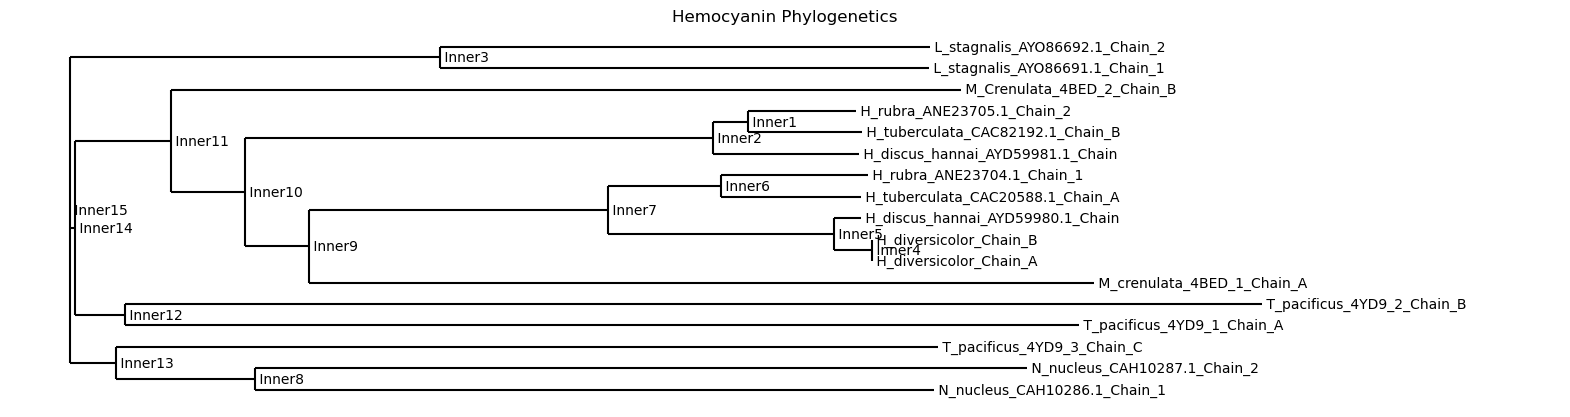

In [8]:
# Make a better looking tree using the features of matplotlib 

fig = plt.figure(figsize=(20, 5), dpi=100) 
axes = fig.add_subplot(1, 1, 1)
axes.axis("off")
axes.set_title('Hemocyanin Phylogenetics')
Phylo.draw(snail_tree, axes=axes,show_confidence=True)
fig.savefig("snail_cladogram")

### Phylogenetics II

In [44]:
chain_a = "data/alignments/M_crenulata_4BED_1_Chain_A_91912.aln"
chain_b = "data/alignments/M_crenulata_4BED_1_Chain_B_91913.aln"

def namer(old, new):
    new_with_names = open(new, "w")
    with open(old, "r") as f:
        for line in f:
            if line[0] == ">" and len(line.split("organism=")) > 1:
                org = line.split("organism=")[1].split("]")[0]
                org = org.split(" ")[0][0]+"_"+"_".join(org.split(" ")[1:])
                ref = line.split("|")[1] + "_" + line.split("|")[0][1:]
                new_with_names.write(">{}_{} [ref={}]\n".format(org, 
                                                                line.split("|")[1], 
                                                                ref))
            else:
                new_with_names.write(line)
        
namer(chain_a, "data/alignments/a_named.aln")
namer(chain_b, "data/alignments/b_named.aln")


In [45]:
# Open the alignment file as a MultipleSeqAlignment object 
chain_a = "data/alignments/a_named.clw"

with open(chain_a,"r") as aln: 
    alignment_a = AlignIO.read(aln, "clustal")

calculator = DistanceCalculator(model="pam250")
distance_matrix = calculator.get_distance(alignment_a)

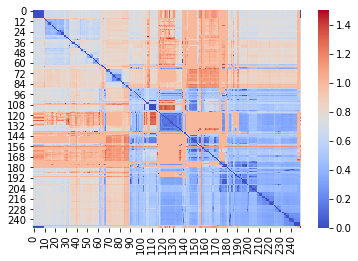

In [47]:
sns.heatmap(np.array(distance_matrix),
            cmap='coolwarm', 
            annot=False)

In [48]:
np.array(distance_matrix)

array([[0.        , 0.00836551, 0.00965251, ..., 1.        , 1.        ,
        0.01480051],
       [0.00836551, 0.        , 0.00322165, ..., 1.        , 1.        ,
        0.00837629],
       [0.00965251, 0.00322165, 0.        , ..., 1.        , 1.        ,
        0.00966495],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01480051, 0.00837629, 0.00966495, ..., 1.        , 1.        ,
        0.        ]])

In [49]:
distance_matrix.names

['P_megaterium_WP_140451289.1/1-297',
 'B_sp._ME40_WP_182421027.1/1-297',
 'P_megaterium_WP_116741674.1/1-297',
 'P_megaterium_QDZ79566.1/1-297',
 'P_aryabhattai_WP_176343732.1/1-297',
 'P__WP_098627599.1/1-297',
 'B__WP_033580244.1/1-297',
 'B__WP_155007861.1/1-297',
 'P_aryabhattai_WP_063247439.1/1-297',
 'P__WP_048019525.1/1-297',
 'R_filosa_ETO24212.1/1-399',
 'A_bacterium_TML62553.1/1-262',
 'A_bacterium_TMK92054.1/1-268',
 'T_bacterium_MBD0283731.1/1-275',
 'G_dictyosporus_WP_091107179.1/1-275',
 'M_altitudinis_WP_171058330.1/1-275',
 'G_aquaeductus_WP_142458631.1/1-275',
 'L_sp._Leaf336_WP_055914699.1/1-284',
 'u_Solirubrobacteraceae_bacterium_CAA9530228.1/1-283',
 'T_bacterium_MBA3509101.1/1-280',
 'A_bacterium_TML24051.1/1-264',
 'A_bacterium_TMK69989.1/1-271',
 'C_bacterium_TMC02914.1/1-270',
 'C_bacterium_13_1_20CM_4_61_6_OLE96702.1/1-295',
 'P_sp._73-21_OJY40013.1/1-268',
 'A_bacterium_TMM37872.1/1-263',
 'M_caceresii_KGH45000.1/1-264',
 'M_sp._KNN46-3_WP_164702186.1/1-266'

In [55]:
df = pd.DataFrame(np.array(distance_matrix), 
                  index = distance_matrix.names, 
                  columns = distance_matrix.names)

In [61]:
df["species"] = ["_".join(x.split("_")[0:2]) for x in df.index]

In [62]:
df

,P_megaterium_WP_140451289.1/1-297,B_sp._ME40_WP_182421027.1/1-297,P_megaterium_WP_116741674.1/1-297,P_megaterium_QDZ79566.1/1-297,P_aryabhattai_WP_176343732.1/1-297,P__WP_098627599.1/1-297,B__WP_033580244.1/1-297,B__WP_155007861.1/1-297,P_aryabhattai_WP_063247439.1/1-297,P__WP_048019525.1/1-297,...,H_discus_hannai_AYD59980.1/1-3420,H_rubra_ANE23704.1/1-3421,H_tuberculata_CAC20588.1/1-3419,M_crenulata_CAG28307.2/1-3125,M_crenulata_CAG28309.2/1-3408,M_crenulata_Q10583.2/1-3414,M_crenulata_4BED/1-1664,lcl|Query_91912/1-1664,B_sp._Root239_WP_057244255.1/1-297,species
P_megaterium_WP_140451289.1/1-297,0.000000,0.008366,0.009653,0.013496,0.015414,0.016057,0.016067,0.015424,0.021236,0.030789,...,0.716692,0.711332,0.696018,0.710890,0.710890,0.710890,1.0,1.0,0.014801,P_megaterium
B_sp._ME40_WP_182421027.1/1-297,0.008366,0.000000,0.003222,0.008997,0.010276,0.010918,0.010925,0.010283,0.016742,0.026940,...,0.720307,0.713410,0.698084,0.715272,0.715272,0.715272,1.0,1.0,0.008376,B_sp.
P_megaterium_WP_116741674.1/1-297,0.009653,0.003222,0.000000,0.010283,0.008349,0.008992,0.008997,0.008355,0.014810,0.025016,...,0.718774,0.711877,0.696552,0.714505,0.714505,0.714505,1.0,1.0,0.009665,P_megaterium
P_megaterium_QDZ79566.1/1-297,0.013496,0.008997,0.010283,0.000000,0.002569,0.003211,0.003213,0.002571,0.014781,0.023092,...,0.726926,0.719298,0.704805,0.719633,0.719633,0.719633,1.0,1.0,0.012211,P_megaterium
P_aryabhattai_WP_176343732.1/1-297,0.015414,0.010276,0.008349,0.002569,0.000000,0.000642,0.001285,0.000642,0.012845,0.020526,...,0.725954,0.718321,0.703817,0.719419,0.719419,0.719419,1.0,1.0,0.013487,P_aryabhattai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M_crenulata_CAG28309.2/1-3408,0.710890,0.715272,0.714505,0.719633,0.719419,0.719419,0.718439,0.718439,0.718774,0.718774,...,0.230955,0.228258,0.224619,0.000000,0.000000,0.000000,0.0,0.0,0.714505,M_crenulata
M_crenulata_Q10583.2/1-3414,0.710890,0.715272,0.714505,0.719633,0.719419,0.719419,0.718439,0.718439,0.718774,0.718774,...,0.230760,0.228089,0.223857,0.000000,0.000000,0.000000,0.0,0.0,0.714505,M_crenulata
M_crenulata_4BED/1-1664,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.227990,0.227974,0.220647,0.000000,0.000000,0.000000,0.0,0.0,1.000000,M_crenulata
lcl|Query_91912/1-1664,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.227990,0.227974,0.220647,0.000000,0.000000,0.000000,0.0,0.0,1.000000,lcl|Query_91912/1-1664


#### Kmer analysis

In [36]:
kmer_species = {}
with open("data/Alignments.fasta","r") as fasta:
    for line in fasta:
        if line[0] == ">":
            name = line[1:].strip()
            current = kmer_species[name] = {}
            current["protein"] = []
        else:
            current["protein"].append(line.strip())
            
for protein in kmer_species:
    kmer_species[protein]["protein"] = "".join(kmer_species[protein]["protein"])

In [37]:
def kmers(p_dict, max_size = 75):
    """Returns kmer dictionary given a string, percent substring, and top %"""
    occurrences = {}
    for protein in p_dict:
        print(protein)
        seq = p_dict[protein]["protein"]
        
        # Make list of all substrings
        sub_strings = [seq[i: j] for i in range(len(seq)) 
                                 for j in range(i + 1, len(seq) + 1)
                                 if len(seq[i:j]) <= max_size]

        # Create counter dictionary
        counter = Counter(sub_strings)

        # We can sort dictionaries in python 3.7+
        indexed_counts = dict(sorted(counter.items(), 
                                     key=lambda x: x[1], reverse=True))
        
        # create list of sorted kmers
        indexed_counts = {k: [len(k), v, protein] 
                          for k, v in indexed_counts.items()}
        
        indexed_counts = dict(sorted(indexed_counts.items(),
                                               key=lambda x: (-x[1][0], x[1][1]),
                                               reverse=True))
        
        # Populate the occurrence dictionary
        for kmer in indexed_counts:
            if kmer not in occurrences:
                # Short hand variables
                entry = occurrences[kmer] = {}
                index_l = indexed_counts[kmer]
                
                # Population of items
                entry["times"] = 1
                entry["length"] = index_l[0]
                entry["totals"] = index_l[1]
                
                # Add a 1/0 column for if it is in a protein list
                for p in p_dict:
                    entry[p] = 0
                
                entry[index_l[2]] = 1
                
            else:
                # Short hand variables
                entry = occurrences[kmer]
                index_l = indexed_counts[kmer]
                
                # Population of items
                entry["times"] += 1
                entry["totals"] += index_l[1]
                entry[index_l[2]] += 1
        
        p_dict[protein]["kmers"] = dict(sorted(indexed_counts.items(),
                                               key=lambda x: (-x[1][0], x[1][1]),
                                               reverse=True)) 
        
    p_dict["occurrences"] = occurrences
        
    return(p_dict)

In [38]:
kmer_species = kmers(kmer_species)

M_crenulata_4BED_1_Chain_A
M_Crenulata_4BED_2_Chain_B
T_pacificus_4YD9_1_Chain_A
T_pacificus_4YD9_2_Chain_B
T_pacificus_4YD9_3_Chain_C
H_tuberculata_CAC20588.1_Chain_A
H_tuberculata_CAC82192.1_Chain_B
H_rubra_ANE23704.1_Chain_1
H_rubra_ANE23705.1_Chain_2
H_discus_hannai_AYD59980.1_Chain_1
H_discus_hannai_AYD59981.1_Chain_2
H_diversicolor_Chain_A
H_diversicolor_Chain_B
N_nucleus_CAH10286.1_Chain_1
N_nucleus_CAH10287.1_Chain_2
L_stagnalis_AYO86692.1_Chain_2
L_stagnalis_AYO86691.1_Chain_1


In [55]:
df = pd.DataFrame.from_dict(kmer_species["occurrences"])

In [58]:
df = df.T

In [59]:
df.head()

,times,length,totals,M_crenulata_4BED_1_Chain_A,M_Crenulata_4BED_2_Chain_B,T_pacificus_4YD9_1_Chain_A,T_pacificus_4YD9_2_Chain_B,T_pacificus_4YD9_3_Chain_C,H_tuberculata_CAC20588.1_Chain_A,H_tuberculata_CAC82192.1_Chain_B,H_rubra_ANE23704.1_Chain_1,H_rubra_ANE23705.1_Chain_2,H_discus_hannai_AYD59980.1_Chain_1,H_discus_hannai_AYD59981.1_Chain_2,H_diversicolor_Chain_A,H_diversicolor_Chain_B,N_nucleus_CAH10286.1_Chain_1,N_nucleus_CAH10287.1_Chain_2,L_stagnalis_AYO86692.1_Chain_2,L_stagnalis_AYO86691.1_Chain_1
L,17,1,4135,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
D,17,1,3354,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A,17,1,3296,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
E,17,1,2992,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
H,17,1,2675,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [75]:
df = df.sort_values(["times", "length", "totals"], ascending = (False, False, False))

In [76]:
df.head()

,times,length,totals,M_crenulata_4BED_1_Chain_A,M_Crenulata_4BED_2_Chain_B,T_pacificus_4YD9_1_Chain_A,T_pacificus_4YD9_2_Chain_B,T_pacificus_4YD9_3_Chain_C,H_tuberculata_CAC20588.1_Chain_A,H_tuberculata_CAC82192.1_Chain_B,H_rubra_ANE23704.1_Chain_1,H_rubra_ANE23705.1_Chain_2,H_discus_hannai_AYD59980.1_Chain_1,H_discus_hannai_AYD59981.1_Chain_2,H_diversicolor_Chain_A,H_diversicolor_Chain_B,N_nucleus_CAH10286.1_Chain_1,N_nucleus_CAH10287.1_Chain_2,L_stagnalis_AYO86692.1_Chain_2,L_stagnalis_AYO86691.1_Chain_1
RVFAGFLL,17,8,41,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
RVFAGFL,17,7,41,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
VFAGFLL,17,7,41,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PYWDWT,17,6,93,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
FAGFLL,17,6,51,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [78]:
df[df["times"] > 3]

,times,length,totals,M_crenulata_4BED_1_Chain_A,M_Crenulata_4BED_2_Chain_B,T_pacificus_4YD9_1_Chain_A,T_pacificus_4YD9_2_Chain_B,T_pacificus_4YD9_3_Chain_C,H_tuberculata_CAC20588.1_Chain_A,H_tuberculata_CAC82192.1_Chain_B,H_rubra_ANE23704.1_Chain_1,H_rubra_ANE23705.1_Chain_2,H_discus_hannai_AYD59980.1_Chain_1,H_discus_hannai_AYD59981.1_Chain_2,H_diversicolor_Chain_A,H_diversicolor_Chain_B,N_nucleus_CAH10286.1_Chain_1,N_nucleus_CAH10287.1_Chain_2,L_stagnalis_AYO86692.1_Chain_2,L_stagnalis_AYO86691.1_Chain_1
RVFAGFLL,17,8,41,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
RVFAGFL,17,7,41,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
VFAGFLL,17,7,41,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PYWDWT,17,6,93,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
FAGFLL,17,6,51,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PEV,4,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
YYF,4,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
IM,4,2,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
GW,4,2,7,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
with open('data/kmer_dataframe.pickle', 'wb') as f:
    pickle.dump(df, f)

#### Download File

In [3]:
def write_fasta(filename, header, sequence):
    """Function to write fasta files
    filename: string, should end in ".fasta"
    header: string, sequence header
    sequence: string, sequence content
    
    >>>write_fasta("KLH1.fasta", KLH1_header, KLH1_seq)
    """
    f = open(filename, "a")
    f.write(header)
    for line in sequence:
        f.write("\n")
        f.write(line.strip("'"))
    f.close()

In [4]:
# get protein sequence using KLH1 and KLH2 uniprot protein ID
KLH1 = requests.get("https://www.uniprot.org/uniprot/Q10583.fasta")
KLH2 = requests.get("https://www.uniprot.org/uniprot/Q10584.fasta")

In [5]:
# wrangle data into fasta format
KLH1_resp = str(KLH1.content).split('\\n')
KLH2_resp = str(KLH2.content).split('\\n')

KLH1_header = KLH1_resp[0][2:]
KLH1_seq = KLH1_resp[1:]

KLH2_header = KLH2_resp[0][2:]
KLH2_seq = KLH2_resp[1:]

In [11]:
KLH2_seq[0:5]

['MWTILALLTATLLFEGAFSVDTVVRKNVDSLSSDEVLALEKALDDLQQDDSNQGYQAIAG',
 'YHGVPTMCVDKHEKNVACCLHGMPSFPLWHRLYVVQLERALIRKKATISIPYWDWTSELT',
 'HLPELVSHPLFVGTEGGKAHDNSWYRADITFLNKKTSRAVDDRLFEKVQPGHHTRLMEGI',
 'LDALEQDEFCKFEIQFELAHNAIHYLVGGRHTYSMSHLEYTSYDPLFFLHHSNTDRIFAI',
 'WQRLQQLRGKDPNSADCAHNLIHTPMEPFDRDTNPLDLTREHAKPADSFDYGRLGYQYDD']

In [10]:
# create empty files
KLH1_fasta = "KLH1.faa"
KLH2_fasta = "KLH2.faa"
f1 = open(KLH1_fasta, "w")
f2 = open(KLH2_fasta, "w")

In [12]:
# write KLH1.faa and KLH2.faa 
write_fasta(KLH1_fasta, KLH1_header, KLH1_seq)
f1.close()
write_fasta(KLH2_fasta, KLH2_header, KLH2_seq)
f2.close()

#### Blast 

In [42]:
# protein BLAST KLH1 fasta to swissprot database over the internet and save results to XML file
KLH1_string = open(KLH1_fasta).read()
hit_size = 50
KLH1_result_handle = NCBIWWW.qblast("blastp", 
                                    "swissprot", 
                                    KLH1_string, 
                                    hitlist_size = hit_size)

with open("KLH1_swissprot.xml", "w") as out_handle:
    out_handle.write(KLH1_result_handle.read())
KLH1_result_handle.close()

# protein BLAST KLH2 fasta to swissprot database over the internet and save results to XML file
KLH2_string = open(KLH2_fasta).read()
KLH2_result_handle = NCBIWWW.qblast("blastp", 
                                    "swissprot", 
                                    KLH2_string,
                                    hitlist_size = hit_size)

with open("KLH2_swissprot.xml", "w") as out_handle:
    out_handle.write(KLH2_result_handle.read())

KLH2_result_handle.close()

KeyboardInterrupt: 

#### Parse Blast Results 

In [45]:
# KLH Complete

KLH_ac = open("data/KHLH_ac.xml")
KLH_ac_blast_record = NCBIXML.read(KLH_ac)
KLH_bd = open("data/KHLH_bd.xml")
KLH_bd_blast_record = NCBIXML.read(KLH_bd)



In [46]:
# parse blast results to create list of protein IDs with a blast E value lower than 1e-7
KLH1_blast_hits = []
E_VALUE_THRESH = 0.1
for alignment in KLH_ac_blast_record.alignments:
#     print("***ALIGNMENT***")
    for hsp in alignment.hsps:
        if hsp.expect < E_VALUE_THRESH:
            for entry in str(alignment.title).split(">"):
                ID = entry.split("|")[1]
                if ID not in KLH1_blast_hits:
                    KLH1_blast_hits.append(ID)
#                 print(entry.split("|")[1])
#             print(str(alignment.title))
            break
    
# parse blast results to create list of protein IDs with a blast E value lower than 1e-7
KLH2_blast_hits = []
for alignment in KLH_bd_blast_record.alignments:
#     print("***ALIGNMENT***")
    for hsp in alignment.hsps:
        if hsp.expect < E_VALUE_THRESH:
            for entry in str(alignment.title).split(">"):
                ID = entry.split("|")[1]
                if ID not in KLH2_blast_hits:
                    KLH2_blast_hits.append(ID)           
#                 print(entry.split("|")[1])
#             print(str(alignment.title))
            break

In [36]:
len(KLH1_blast_hits)

1488

In [47]:
# get protein sequences from Entrez and write to fasta file
with open("KLH1_blast_results.faa", "w") as out_handle:
    for p_id in KLH1_blast_hits:
        fasta = Entrez.efetch(db = "protein", id = p_id, rettype = "fasta")
        fasta_record = SeqIO.read(fasta, "fasta")
        out_handle.write(f'>{fasta_record.id}|{fasta_record.description}\n{fasta_record.seq}\n')

# get protein sequences from Entrez and write to fasta file
with open("KLH2_blast_results.faa", "w") as out_handle:
    for p_id in KLH2_blast_hits:
        fasta = Entrez.efetch(db = "protein", id = p_id, rettype = "fasta")
        fasta_record = SeqIO.read(fasta, "fasta")
        out_handle.write(f'>{fasta_record.id}|{fasta_record.description}\n{fasta_record.seq}\n')

HTTPError: HTTP Error 400: Bad Request

## Citations